<h1 style="text-align: center; color: red; font-size: 25pt; font-weight: bold; text-shadow: 1px 1px 1px rgb(50, 100, 100)"> Terror Attacks In Nigeria .... </h1> 
<p style="font-size: 12pt; text-align: center"> Abubakar Abdulkadir</p>

<img src="images/bg.jpg" style="width: 100%; height:350px; display: inline-block" />

<h1 style='background-color: red; padding: 10px; color: white'> 1.0 Introduction </h1>

In this section of the project, a comprehensive analysis of the dataset is conducted with the aim of elucidating the prominent factors that significantly influence security incidences in Nigeria, employing rigorous methods of hypothesis testing. The investigation encompasses a set of twenty enumerated hypotheses, posited as potential contributors to security crises. Each individual hypothesis is meticulously scrutinized and evaluated in light of the dataset, fostering a meticulous examination of their respective impacts.

<h1 style='background-color: red; padding: 10px; color: white'> 1.0 Hypothesis </h1>

1. The level of education significantly affects security incidences in Nigeria.
2. The level of isolation has a substantial impact on security incidences in Nigeria.
3. Natural barriers play a significant role in influencing security incidences in Nigeria.
4. Elevation has a notable influence on security incidences in Nigeria.
5. Population size has a significant correlation with security incidences in Nigeria.
6. The major occupation of a region significantly impacts security incidences in Nigeria.
7. Political stability has a significant effect on security incidences in Nigeria.
8. The economic situation significantly influences security incidences in Nigeria.
9. Access to food has a noteworthy impact on security incidences in Nigeria.
10. The employment rate has a significant correlation with security incidences in Nigeria.
11. Ethnic marginalization significantly affects security incidences in Nigeria.
12. The presence of well-developed transport infrastructure has a significant influence on security incidences in Nigeria.
13. Longitude exhibits a significant correlation with security incidences in Nigeria.
14. Latitude displays a significant correlation with security incidences in Nigeria.
15. Income equality significantly impacts security incidences in Nigeria.
16. The major ethnic group in a region has a significant effect on security incidences in Nigeria.
17. The availability of a robust communication network significantly influences security incidences in Nigeria.
18. Infrastructure development has a significant correlation with security incidences in Nigeria.
19. The dominant age group in a region significantly affects security incidences in Nigeria.

<h1 style='background-color: red; padding: 10px; color: white'> 2.0 Importing Dataset </h1>

In [280]:
import re
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
#save dateset into the cleaned folder
df_acled = pd.read_csv('datasets/preprocessed/df_acled.csv')

# save this dataset into the cleaned folder
df_lga = pd.read_csv('datasets/preprocessed/df_lga.csv')

# save dataset as a new csv file
df_gtd = pd.read_csv('datasets/preprocessed/df_gtd.csv')

# save this dataset into the cleaned folder
df_lga_features = pd.read_csv('datasets/preprocessed/df_lga_features.csv')

<h1 style='background-color: red; padding: 10px; color: white'> 3.0 Data Analysis </h1>

## 3.1 Level of Education

For this purpose, the lga features dataset was merged with the acled dataset on the lga name feature. The education level feature is in the lga dataset while the acled dataset contains information about security incidences in different places in Nigeria.

In [282]:
# merge the ACLED dataset with the LGA features
df_acled = df_acled.rename(columns={'admin2': 'lga_name'}) # rename the admin2 to lga_name in acled
df_lga_features = df_lga_features.rename(columns={'Lga Name': 'lga_name'}) # rename the Lga Name to lga_name in LGA features dataset
df_acled_lga = pd.merge(df_acled, df_lga_features, on='lga_name')

### 3.1.1 Total Number of Security Incidences by Percentage Educated

"In this project section, we examine the relationship between the level of education and the occurrence of security incidences in different Local Government Areas. We group the Local Government Areas based on the percentage of educated individuals within each area. The goal is to determine the total number of security incidences that have taken place in each bin, representing a specific range of percentage educated. By aggregating the number of incidences within each bin, we obtain a comprehensive view of the total number of security incidences, categorized according to the percentage of educated individuals in each Local Government Area.

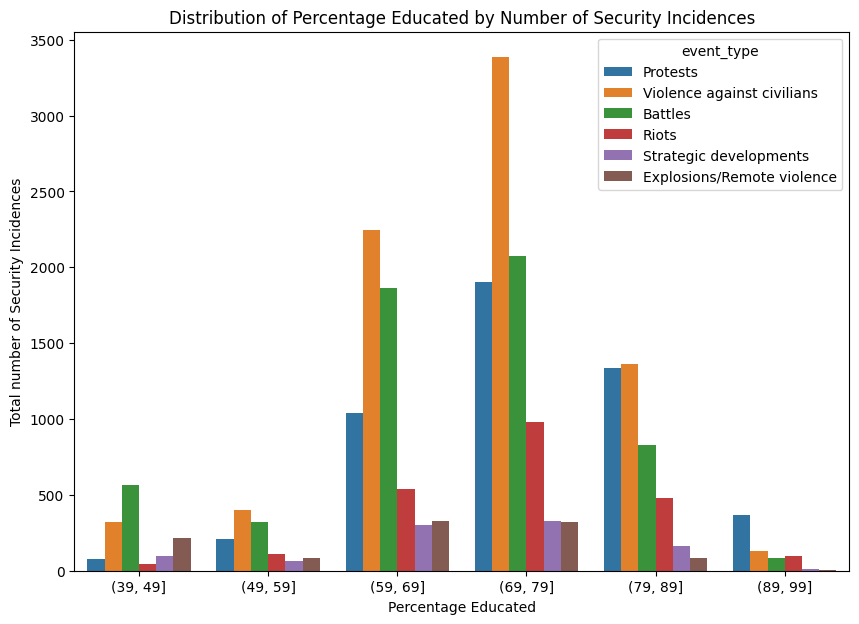

In [300]:
# Define the bin edges
bin_edges = [39, 49, 59, 69, 79, 89, 99]  # Adjust the bin edges as desired


# Create a new column 'bin' by grouping 'x' values into bins
df_acled_lga['bin'] = pd.cut(df_acled_lga['percentage of educated'], bins=bin_edges)

# Setting the figure size
plt.figure(figsize=(10, 7))  # Adjust the width and height as desired

# Plotting line plot
sns.countplot(data=df_acled_lga, x='bin', hue='event_type')

# Adding labels and title
plt.xlabel('Percentage Educated')
plt.ylabel('Total number of Security Incidences')
plt.title('Distribution of Percentage Educated by Number of Security Incidences')

plt.show()

In [301]:
# Viewing the number of Local governments in each bin
pd.cut(df_lga_features['percentage of educated'], bins=bin_edges).value_counts()

(69, 79]    332
(59, 69]    201
(79, 89]    140
(49, 59]     29
(39, 49]     16
(89, 99]      9
Name: percentage of educated, dtype: int64

The above chart reveals that the highest number of security incidences occurs in Local Government Areas where the percentage of educated individuals falls within the range of 60% to 70%, followed by 70% to 80%. However, upon closer examination of the total number of local governments within each bin, it becomes evident that the chart does not provide an accurate representation of the impact of education on security in Nigeria.

The higher number of security incidences in the 60% to 70% bin is primarily due to the fact that out of the 774 local governments in Nigeria, 284 local governments are classified within this range. On the other hand, the 30% to 40% and 90% to 100% bins comprise only 4 and 2 local governments, respectively. Consequently, the lower number of security incidences in these bins is attributed to the smaller sample size of local governments.

### 3.1.2 Average Number of Security Incidences by Percentage Educated

To obtain a more appropriate metric for assessing the relationship between education and security, it is advisable to consider the average number of security incidences per class (SI). This metric takes into account the varying sample sizes within each bin and provides a more accurate evaluation of the impact of education on security across different ranges of educated individuals.

$ SI = \frac{N}{ L} $

where N is the total security incidence in a class
and L is the number os local governments in the class

In [285]:
# get the local government counts in each bin
lga_value_counts = pd.cut(df_lga_features['percentage of educated'], bins=bin_edges).value_counts()

# get a list of all security event types
event_types = list(df_acled_lga['event_type'].unique())

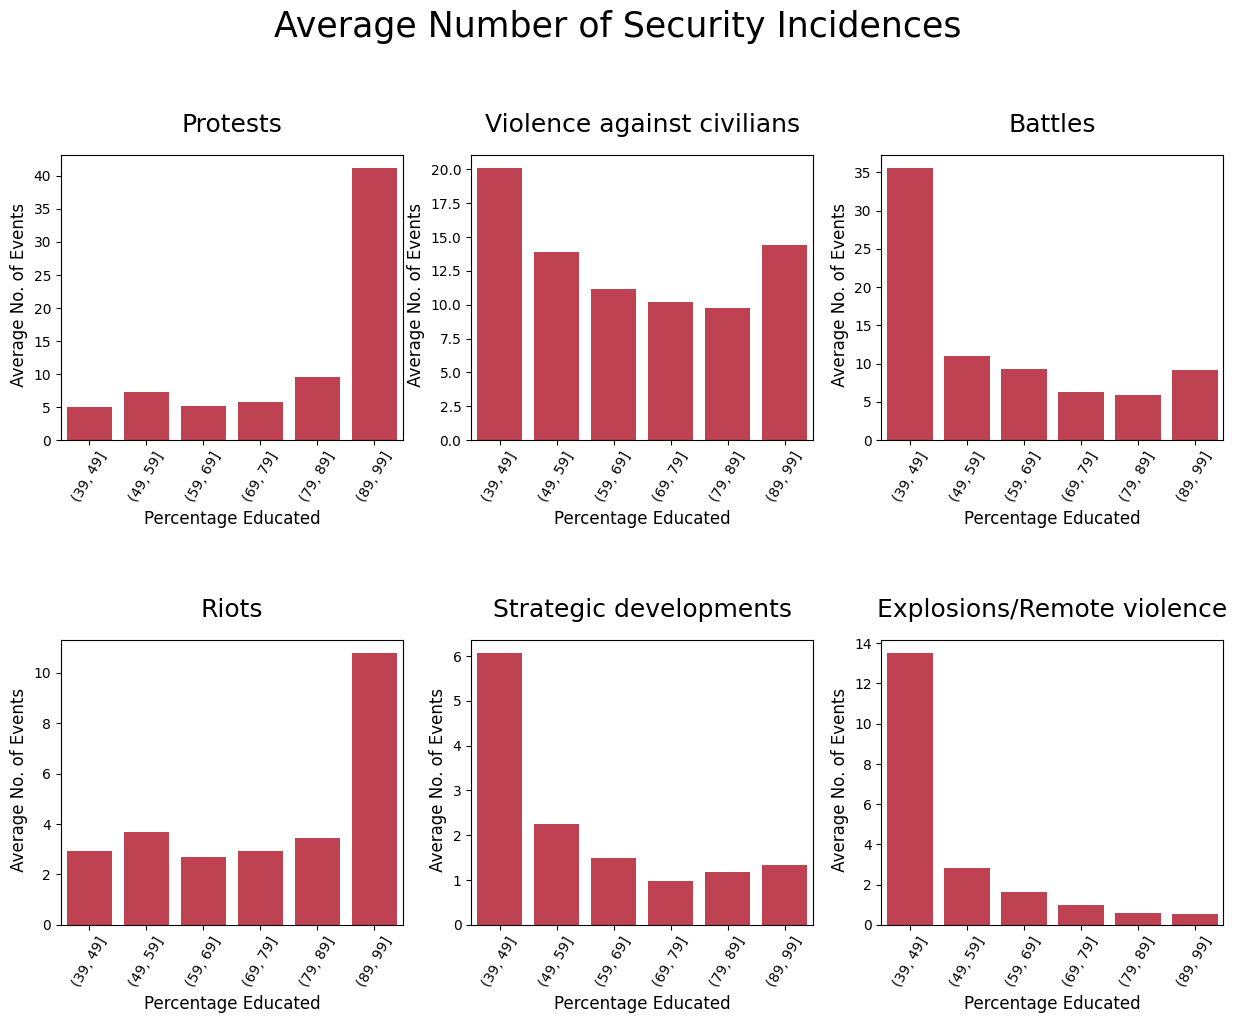

In [302]:
# Create a figure and axis objects using subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


row, col = 0, 0

for index , event in enumerate(event_types):
    df = df_acled_lga[df_acled_lga['event_type'] == event]
    df = df['bin'].value_counts().sort_index() / lga_value_counts.sort_index()
    
    col = index % 3
    if index > 2 : row = 1
    
    sns.barplot(x=df.index, y=df.values, ax=axes[row, col], color='#D32D41')
    axes[row, col].set_title('{}'.format(event), fontsize=18, y=1.05)
    axes[row, col].set_xlabel('Percentage Educated', fontsize=12)
    axes[row, col].set_ylabel(' Average No. of Events', fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=60)
    plt.subplots_adjust(wspace=0.2, hspace=0.7)

    
plt.suptitle('Average Number of Security Incidences ', fontsize='25', y=1.025)
plt.show()
df_acled_lga.drop('bin', axis=1, inplace=True)

### 3.1.3 Number of Fatalities by Percentage Educated

In this section, we focus on the Number of Fatalities, a crucial metric in assessing security concerns in relation to the Percentage Educated. We aggregate the number of fatalities within each bin to obtain the total casualties for each local government area. Additionally, we explore the use of the average casualties as a more appropriate metric for analysis.

By summing the fatalities within each bin, we gain insight into the overall impact of security incidents across different levels of educational attainment in the local government areas. This allows us to assess the severity of casualties in relation to the educational background of the population.

Furthermore, to obtain a more meaningful measure, we investigate the average casualties. This metric provides a more balanced representation by considering the varying sample sizes and accounting for potential outliers. Analyzing the average casualties helps us gain a comprehensive understanding of the relationship between education and the severity of security incidents, enabling us to draw more accurate conclusions about the impact of education on casualties within local government areas.

In [295]:
# Define the bin edges
# bin_edges = [39, 45, 49, 55, 59, 65, 69, 75, 79, 85, 89, 95]  # Adjust the bin edges as desired

bin_edges = [39, 49, 59, 69, 79, 89, 99]  # Adjust the bin edges as desired

# Create a new column 'bin' by grouping 'x' values into bins
df_acled_lga['bin'] = pd.cut(df_acled_lga['percentage of educated'], bins=bin_edges)

# get the local government counts in each bin
lga_value_counts = pd.cut(df_lga_features['percentage of educated'], bins=bin_edges).value_counts().sort_index()

# get total number of casualties
no_casualties = df_acled_lga.groupby('bin')['fatalities'].sum().sort_index()


#get average number of casualties
avg_no_casualties = no_casualties / lga_value_counts

table_casualties = pd.DataFrame({'% Educated Bin' : lga_value_counts.index
                                 , '# LGA in Bin' : lga_value_counts.values
                                 , 'Total # of Casualties' : no_casualties.values
                                 , 'Average # of Casualties' : avg_no_casualties.values}) 

table_casualties = table_casualties.sort_values('% Educated Bin')
table_casualties

,% Educated Bin,# LGA in Bin,Total # of Casualties,Average # of Casualties
0,"(39, 49]",16,10059,628.687500
1,"(49, 59]",29,3978,137.172414
2,"(59, 69]",201,23751,118.164179
3,"(69, 79]",332,26247,79.057229
4,"(79, 89]",140,7310,52.214286
5,"(89, 99]",9,321,35.666667


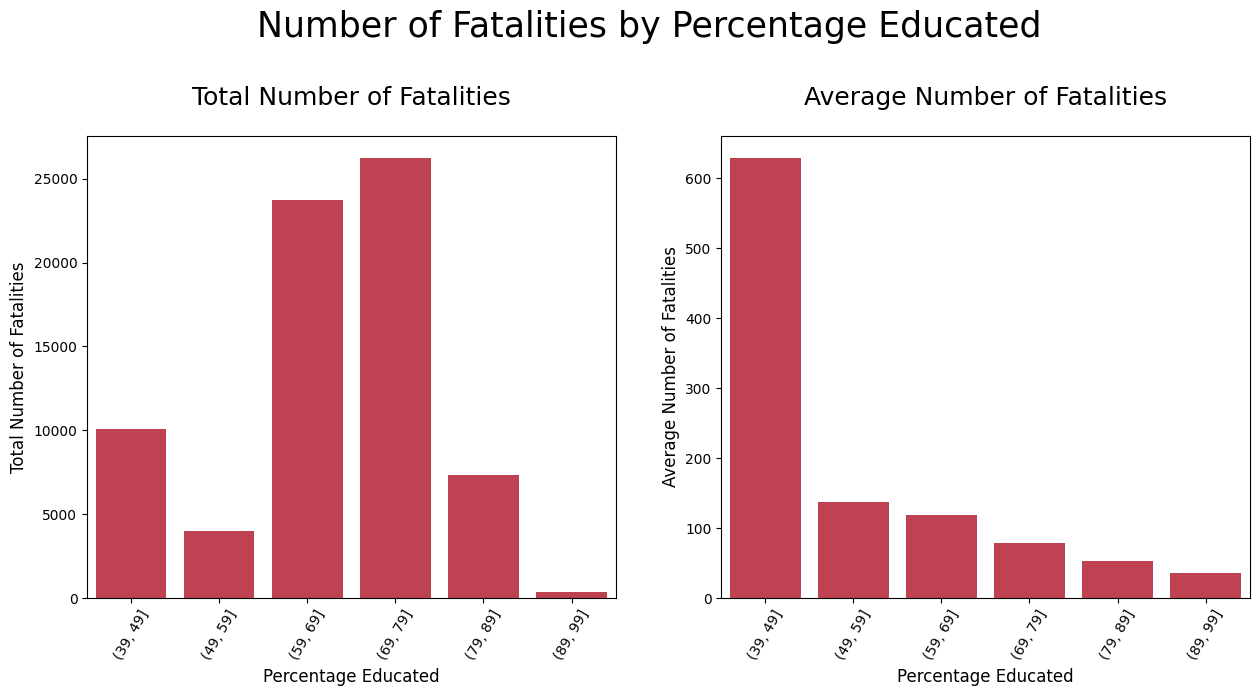

In [303]:
# Create a figure and axis objects using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
sns.barplot(x=table_casualties['% Educated Bin'], y=table_casualties['Total # of Casualties']
            , ax=axes[0], color='#D32D41')

axes[0].set_title('Total Number of Fatalities', fontsize=18, y=1.05)
axes[0].set_xlabel('Percentage Educated', fontsize=12)
axes[0].set_ylabel('Total Number of Fatalities', fontsize=12)
axes[0].tick_params(axis='x', rotation=60)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

sns.barplot(x=table_casualties['% Educated Bin'], y=table_casualties['Average # of Casualties']
                , ax=axes[1], color='#D32D41')

axes[1].set_title('Average Number of Fatalities', fontsize=18, y=1.05)
axes[1].set_xlabel('Percentage Educated', fontsize=12)
axes[1].set_ylabel('Average Number of Fatalities', fontsize=12)
axes[1].tick_params(axis='x', rotation=60)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

    
plt.suptitle('Number of Fatalities by Percentage Educated', fontsize='25', y=1.09)
plt.show()

### 3.1.4 Findings

Based on the findings from this section, the following key observations can be made:

1. Educational level emerges as a significant contributing factor to the level of security in Nigeria. The analysis highlights a notable relationship between education and security outcomes within the country.

2. An almost inverse relationship is observed between the level of education and the number of casualties. This suggests that as the educational level of individuals in a given area increases, there is a corresponding decrease in security incidences resulting in fatalities.

3. Local government areas characterized by lower levels of education, specifically falling within the 39% to 49% range, exhibited a higher incidence of security events leading to an average of over 600 fatalities. This indicates that each local government area within this range has experienced 600 or more fatalities during the considered time period.

4. The total number of security incidences in local governments, categorized by the level of education, varies depending on the specific event type under consideration. However, it is evident that local governments with lower levels of education tend to experience event types that are more likely to result in a higher number of fatalities.

5. Interestingly, areas with a higher level of education demonstrate a higher number of security incidences, particularly related to protests and riots.

### 3.2.1 Level of Isolation

In [17]:
df_acled_lga.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1', 'inter1',
       'actor2', 'inter2', 'interaction', 'iso', 'admin1', 'lga_name',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp',
       'percentage of educated', 'Level of Isolation', 'Elevation',
       'Population', 'Major Ocupation', 'Political stability',
       'Economic Situation', 'Average Cost of living', 'Employment rate',
       'Ethnic Marginalization', 'Transport infrastructure', 'Longitude',
       'Latitude', 'Income Equality', 'Major ethnic group',
       'Communication network', 'Infrastructure development',
       'Dominant Age group', 'Average family size', 'Average education level',
       'Average Income in Naira', 'Has River', 'Has Swamp', 'Has Hill',
       'Has Forest', 'Has Mountain', 'Has ocean', 'Has valley', 'Has desert',
       'Has rock', 'Has plate

In [229]:
df_acled_lga[df_acled_lga['event_type'] >= 'Strategic developments'][['lga_name', 'sub_event_type', 'actor1', 'actor2']]

,lga_name,sub_event_type,actor1,actor2
1,Akure North,Abduction/forced disappearance,Fulani Ethnic Militia (Nigeria),Civilians (Nigeria)
2,Akure North,Attack,Fulani Ethnic Militia (Nigeria),Civilians (Nigeria)
7,Akure North,Abduction/forced disappearance,Unidentified Armed Group (Nigeria),Civilians (Nigeria)
8,Akure North,Attack,Fulani Ethnic Militia (Nigeria),Civilians (Nigeria)
9,Akure North,Attack,Unidentified Armed Group (Nigeria),Civilians (Nigeria)
...,...,...,...,...
22762,Ado,Attack,Unidentified Armed Group (Nigeria),Civilians (Nigeria)
22763,Ado,Attack,Fulani Ethnic Militia (Nigeria),Civilians (Nigeria)
22764,Ado,Abduction/forced disappearance,Unidentified Armed Group (Nigeria),Civilians (Nigeria)
22765,Ado,Attack,Unidentified Armed Group (Nigeria),Civilians (Nigeria)


### FUNCTIONS

In [ ]:
def get_ratio(df, row):
    